In [ ]:
# watermarked
# https://drive.google.com/file/d/1hWKG9_0YiF1H4zZxedE5qCpAmBTDD2xV/view?usp=share_link
!gdown --id 1hWKG9_0YiF1H4zZxedE5qCpAmBTDD2xV
!unzip watermarked.zip

# nowatermarked
# https://drive.google.com/file/d/1zEy2A4VBFEQzT_DbNY6asLLzor_emZ3E/view?usp=share_link
!gdown --id 1zEy2A4VBFEQzT_DbNY6asLLzor_emZ3E
!unzip nowatermarked.zip

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hWKG9_0YiF1H4zZxedE5qCpAmBTDD2xV
To: /content/watermarked.zip
100% 22.8M/22.8M [00:00<00:00, 26.0MB/s]
Archive:  watermarked.zip
   creating: watermarked/
  inflating: watermarked/2seqol.jpg  
  inflating: __MACOSX/watermarked/._2seqol.jpg  
  inflating: watermarked/2p9dg9.jpg  
  inflating: __MACOSX/watermarked/._2p9dg9.jpg  
  inflating: watermarked/2rxnnd.jpg  
  inflating: __MACOSX/watermarked/._2rxnnd.jpg  
  inflating: watermarked/2wrh1f.jpg  
  inflating: __MACOSX/watermarked/._2wrh1f.jpg  
  inflating: watermarked/2mpbt6.jpg  
  inflating: __MACOSX/watermarked/._2mpbt6.jpg  
  inflating: watermarked/2xkt6c.jpg  
  inflating: __MACOSX/watermarked/._2xkt6c.jpg  
  inflating: watermarked/2r7u6g.jpg  
  inflating: __MA

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import cv2

In [ ]:
import os

# Path to the folders containing the watermarked and non-watermarked images
watermarked_path = "watermarked/"
non_watermarked_path = "nowatermarked/"

# Create a list to store the image paths and their corresponding labels
data = []
labels = []

# Loop through the watermarked images and add them to the data list with a label of 1
for image_path in os.listdir(watermarked_path):
    image = cv2.imread(os.path.join(watermarked_path, image_path))
    image = cv2.resize(image, (224, 224))  # Resize the image to a common size
    data.append(image)
    labels.append(1)

# Loop through the non-watermarked images and add them to the data list with a label of 0
for image_path in os.listdir(non_watermarked_path):
    image = cv2.imread(os.path.join(non_watermarked_path, image_path))
    image = cv2.resize(image, (224, 224))  # Resize the image to a common size
    data.append(image)
    labels.append(0)

# Convert the data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data and labels arrays into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
25/25 [==============================] - 116s 5s/step - loss: 51.5467 - accuracy: 0.5000 - val_loss: 0.6856 - val_accuracy: 0.5150
Epoch 2/10
25/25 [==============================] - 113s 5s/step - loss: 0.6243 - accuracy: 0.6538 - val_loss: 0.7025 - val_accuracy: 0.5500
Epoch 3/10
25/25 [==============================] - 111s 4s/step - loss: 0.5008 - accuracy: 0.7625 - val_loss: 0.7108 - val_accuracy: 0.5500
Epoch 4/10
25/25 [==============================] - 109s 4s/step - loss: 0.3781 - accuracy: 0.8413 - val_loss: 0.7523 - val_accuracy: 0.6100
Epoch 5/10
25/25 [==============================] - 113s 5s/step - loss: 0.2852 - accuracy: 0.8913 - val_loss: 0.8692 - val_accuracy: 0.5400
Epoch 6/10
25/25 [==============================] - 109s 4s/step - loss: 0.2105 - accuracy: 0.9187 - val_loss: 1.0342 - val_accuracy: 0.5350
Epoch 7/10
25/25 [==============================] - 108s 4s/step - loss: 0.1547 - accuracy: 0.9475 - val_loss: 1.0735 - val_accuracy: 0.6100
Epoch 8/10
2

In [ ]:
from google.colab.patches import cv2_imshow

def detect_watermark(image_path):
    # Load the image and resize it to a common size
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))

    # Make a prediction on the image
    prediction = model.predict(np.array([image]))
    if prediction[0][0] > 0.5:
        # If the prediction is positive, find the contours of the watermark in the image
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw a bounding box around the watermark
        x, y, w, h = cv2.boundingRect(contours[0])
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2_imshow(image)
        return image
    else:
        return None

In [ ]:
# watermark1
# https://drive.google.com/file/d/1kdxK8ynt1_UNen3UcoFd4OFIhfPDGQaQ/view?usp=share_link
!gdown --id 1kdxK8ynt1_UNen3UcoFd4OFIhfPDGQaQ
!unzip watermark1.zip

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kdxK8ynt1_UNen3UcoFd4OFIhfPDGQaQ
To: /content/watermark1.zip
100% 66.0k/66.0k [00:00<00:00, 41.5MB/s]
Archive:  watermark1.zip
   creating: watermark1/
  inflating: __MACOSX/._watermark1   
  inflating: watermark1/.DS_Store    
  inflating: __MACOSX/watermark1/._.DS_Store  
  inflating: watermark1/1.jpg        
  inflating: __MACOSX/watermark1/._1.jpg  


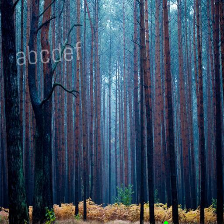

In [ ]:
from google.colab.patches import cv2_imshow

# image = detect_watermark('watermark1/1.jpg')
# print(image.shape)

# Load the image and resize it to a common size
image = cv2.imread('watermark1/1.jpg')
image = cv2.resize(image, (224, 224))

# If the prediction is positive, find the contours of the watermark in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw a bounding box around the watermark
x, y, w, h = cv2.boundingRect(contours[0])
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(image)